In [1]:
pip install sciann


     |████████████████████████████████| 174 kB 4.9 MB/s 
     |████████████████████████████████| 561 kB 33.1 MB/s 
     |████████████████████████████████| 460.3 MB 8.5 kB/s 
     |████████████████████████████████| 14.8 MB 29.5 MB/s 
     |████████████████████████████████| 1.2 MB 39.7 MB/s 
     |████████████████████████████████| 132 kB 52.1 MB/s 
     |████████████████████████████████| 462 kB 45.3 MB/s 
     |████████████████████████████████| 4.0 MB 38.7 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68715 sha256=6b9afe0d4eeef71a6441377d696b57faa29d527d18b1860e528b22919e3fac19
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
  Attempting uninstall: numpy
    Found existin

In [2]:
pip install matplotlib==3.5.1

     |████████████████████████████████| 11.2 MB 4.2 MB/s 
     |████████████████████████████████| 900 kB 51.8 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [1]:

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Dec 20 20:38:35 2021

@author: hosseinhosseiny
"""
import numpy as np
import pandas as pd
from sciann import Variable, Functional, SciModel
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import sciann as sn
import tensorflow as tf

import random
random.seed(3)
np.random.seed(123)
tf.random.set_seed(123)

---------------------- SCIANN 0.6.6.1 ---------------------- 
For details, check out our review paper and the documentation at: 
 +  "https://www.sciencedirect.com/science/article/pii/S0045782520307374", 
 +  "https://arxiv.org/abs/2005.08803", 
 +  "https://www.sciann.com". 

 Need support or would like to contribute, please join sciann`s slack group: 
 +  "https://join.slack.com/t/sciann/shared_invite/zt-ne1f5jlx-k_dY8RGo3ZreDXwz0f~CeA" 
 
TensorFlow Version: 2.5.3 
Python Version: 3.7.13 (default, Mar 16 2022, 17:37:17) 
[GCC 7.5.0] 



In [ ]:
sn.diff

<function sciann.utils.math.grad>

In [2]:
path = '/content/drive/MyDrive/PINN/'

data = pd.read_excel(path+'results_Q1211.xlsx')
#data = data_[data_['Depth'] != 0 ]
data_ = data

#ind = data_['Depth'] == 0
#data_['WaterSurfaceElevation','VelocityX', 'VelocityY', 'ShearStressX','ShearStressY'][ind]=0 WRONG INDEXING
#data_tr.loc[data_tr.y ==0, 'cam1':'cam10'] =0  CORRECT INDEXING

data_['h_categ'] = pd.cut(data_["Elevation"],
                          bins = [0, 4, 8, 12, 16, np.inf],
                          labels = [2, 6, 10, 14, 18 ])
#-------------- scaling the variables
max_x = max(data_['X'])
min_x = min(data_['X'])
max_y = max(data_['Y'])
min_y = min(data_['Y'])
max_z = max(data_['Elevation'])
min_z = min(data_['Elevation'])
max_u = max(data_['VelocityX'])
min_u = min(data_['VelocityX'])
max_v = max(data_['VelocityY'])
min_v = min(data_['VelocityY'])
max_h = max(data_['Depth'])
min_h = min(data_['Depth'])
max_E = max(data_['WaterSurfaceElevation'])
min_E = min(data_['WaterSurfaceElevation'])
max_tawx = max( data_['ShearStressX'])
min_tawx = min( data_['ShearStressX'])
max_tawy = max(data_['ShearStressY'])
min_tawy = min(data_['ShearStressY'])

data_['x_sc'] = (data_['X'] - min_x) / (max_x - min_x)
data_['y_sc'] = (data_['Y'] - min_y) / (max_y - min_y)
data_['z_sc'] = (data_['Elevation'] - min_z) / (max_z - min_z)
data_['u_sc'] = (data_['VelocityX'] - min_u) / (max_u - min_u)
data_['v_sc'] = (data_['VelocityY'] - min_v) / (max_v - min_v)
data_['h_sc'] = (data_['Depth'] - min_h) / (max_h - min_h)
data_['E_sc'] = (data_['WaterSurfaceElevation'] - min_E) / (max_E - min_E)
data_['tawx_sc'] = (data_['ShearStressX'] - min_tawx) / (max_tawx - min_tawx)
data_['tawy_sc'] = (data_['ShearStressY'] - min_tawy) / (max_tawy - min_tawy)

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit (n_splits = 1, test_size = 0.2, random_state = 5)

for train_index, test_index in split.split (data_,data_['h_categ'] ):

  strat_train_set = data_.iloc[train_index]
  strat_test_set = data_.iloc[test_index]

data_tr = data_.loc[train_index]
data_test = data_.loc[test_index]

x_tr_sc = data_tr['x_sc']
y_tr_sc = data_tr['y_sc']
u_tr_sc = data_tr['u_sc']
v_tr_sc = data_tr['v_sc']
h_tr_sc = data_tr['h_sc']
E_tr_sc = data_tr['E_sc']
tawx_tr_sc = data_tr['tawx_sc']
tawy_tr_sc = data_tr['tawy_sc']

x_test_sc = data_test['x_sc']
y_test_sc = data_test['y_sc']
u_test_sc = data_test['u_sc']
v_test_sc = data_test['v_sc']
h_test_sc = data_test['h_sc']
E_test_sc = data_test['E_sc']
tawx_test_sc = data_test['tawx_sc']
tawy_test_sc = data_test['tawy_sc']

In [ ]:
data_tr[:20]

,I,J,X,WaterSurfaceElevation,Y,Elevation,VelocityS,VelocityN,Drag_Coefficient,Helix Strength,...,h_categ,x_sc,y_sc,z_sc,u_sc,v_sc,h_sc,E_sc,tawx_sc,tawy_sc
6806,110,38,1593.991716,840.895567,710.132229,825.190119,1.419702,0.356908,0.003,78.112775,...,18,0.422332,0.399310,0.087068,0.499687,0.398491,0.845093,0.068281,0.630671,0.812918
230,50,2,1611.219291,840.856417,881.340468,841.937274,0.000000,0.000000,0.003,0.000000,...,18,0.463349,0.785891,0.566499,0.707840,0.681229,0.000000,0.053918,0.898971,0.850728
11160,120,62,1612.764516,840.918777,647.432796,839.415905,-0.582839,0.558401,0.003,-5.158387,...,18,0.467028,0.257737,0.494319,0.926099,0.660419,0.080865,0.076797,0.952918,0.848247
4907,21,28,1708.481922,840.755386,893.363332,832.070635,3.745023,0.266202,0.003,-5.554040,...,18,0.694919,0.813038,0.284041,0.067575,0.018423,0.467265,0.016850,0.227843,0.020734
7155,97,40,1617.967604,840.848633,729.573183,826.056312,0.958674,0.385389,0.003,48.374494,...,18,0.479416,0.443207,0.111865,0.631333,0.456014,0.795956,0.051062,0.821970,0.789997
12203,77,68,1703.292992,840.788244,729.053253,836.204528,-1.431917,-0.318539,0.003,3.506802,...,18,0.682564,0.442033,0.402384,0.856657,0.989562,0.246628,0.028906,0.972219,0.991613
9022,154,50,1518.011737,840.953953,630.049173,830.813455,1.576968,0.457554,0.003,15.294889,...,18,0.241434,0.218486,0.248051,0.360020,0.447684,0.545650,0.089703,0.699718,0.756743
2247,76,13,1591.290851,840.778802,808.853107,842.313630,0.000000,0.000000,0.003,0.000000,...,18,0.415902,0.622217,0.577273,0.707840,0.681229,0.000000,0.025442,0.898971,0.850728
11932,168,66,1500.086831,840.926897,579.985317,836.814857,1.013269,0.230416,0.003,4.273066,...,18,0.198757,0.105444,0.419857,0.471772,0.551598,0.221264,0.079776,0.821885,0.811332
17,18,1,1664.171616,840.829542,944.831594,842.012397,0.000000,0.000000,0.003,0.000000,...,18,0.589422,0.929251,0.568650,0.707840,0.681229,0.000000,0.044057,0.898971,0.850728


In [98]:
#-------------PINN/sciann implementation
n_l = 10
n_n = 60
k_Initializer = 'normal'
from sciann import Variable, Functional, SciModel, Data
active = 'tanh'
#--- define variables
x = sn.Variable('x', dtype='float64')
y = sn.Variable('y', dtype='float64')
#
u = sn.Functional('u', [x,y], n_l*[n_n], active,       kernel_initializer=k_Initializer)
v = sn.Functional('v', [x,y], n_l*[n_n], active,       kernel_initializer=k_Initializer)
h = sn.Functional('h', [x,y], n_l*[n_n], active,       kernel_initializer=k_Initializer)
E = sn.Functional('E', [x,y], n_l*[n_n], active,       kernel_initializer=k_Initializer)
tawx = sn.Functional('tawx', [x,y], n_l*[n_n], active, kernel_initializer=k_Initializer)
tawy = sn.Functional('tawy', [x,y], n_l*[n_n], active, kernel_initializer=k_Initializer)

#------ doing the differential
uh_x, vh_y = sn.math.diff((u*h), x) , sn.math.diff((v*h), y)
u2h_x, v2h_y = sn.math.diff((u**2*h), x) , sn.math.diff((v**2*h), y)
E_x, E_y = sn.math.diff(E, x) , sn.math.diff(E, y)
uvh_x , uvh_y = sn.math.diff((u*v*h), x) , sn.math.diff((u*v*h), y)
#tawx_x, tawy_y = sn.math.diff(tawx, x) , sn.math.diff(tawy, y)

#----define the equations/constrains
L1 = sn.Data(uh_x + vh_y)
L2 = sn.Data(u2h_x + uvh_y + (9.81 * h) * (E_x) + (0.001 * tawx)) # ro was assumed 1000 kg/m3
L3 = sn.Data(uvh_x + v2h_y + (9.81 * h) * (E_y) + (0.001 * tawy))
L4 = sn.Data(u)
L5 = sn.Data(v)
L6 = sn.Data(h)
L7 = sn.Data(E)
L8 = sn.Data(tawx)
L9 = sn.Data(tawy)
#----- building the sciann optimization model and tarining it
np.random.seed(123)
tf.random.set_seed(123)
m = sn.SciModel([x,y], [L1, L2, L3, L4, L5, L6, L7, L8, L9], "mse", "RMSprop")


In [ ]:
u



Total samples: 11728 
Batch size: 2000 
Total batches: 6 

Epoch 1/200
6/6 [==============================] - 2s 287ms/step - batch: 2.5000 - size: 1954.6667 - loss: 3917.2244 - add_176_loss: 0.0000e+00 - add_179_loss: 7.3301e-04 - add_182_loss: 7.0401e-04 - u_loss: 634.4397 - v_loss: 619.6583 - h_loss: 614.2139 - E_loss: 611.8158 - tawx_loss: 690.0596 - tawy_loss: 746.1475 - lr: 0.0100 - time: 1.6845
Epoch 2/200
6/6 [==============================] - 2s 261ms/step - batch: 2.5000 - size: 1954.6667 - loss: 2963.1937 - add_176_loss: 0.0000e+00 - add_179_loss: 5.6085e-04 - add_182_loss: 5.3262e-04 - u_loss: 479.6678 - v_loss: 467.6485 - h_loss: 462.5898 - E_loss: 461.2684 - tawx_loss: 523.3643 - tawy_loss: 569.3516 - lr: 0.0100 - time: 1.5531
Epoch 3/200
6/6 [==============================] - 2s 265ms/step - batch: 2.5000 - size: 1954.6667 - loss: 2193.4159 - add_176_loss: 0.0000e+00 - add_179_loss: 4.2141e-04 - add_182_loss: 3.9524e-04 - u_loss: 353.9694 - v_loss: 344.1685 - h_loss: 33

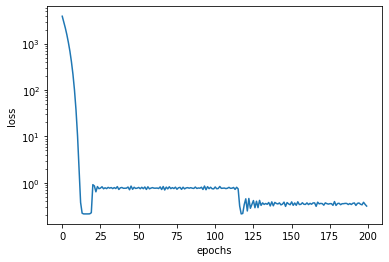

In [100]:
from numpy.random import seed
seed(1)
from tensorflow.random import set_seed 

history = m.train([x_tr_sc.values.flatten(), y_tr_sc.values.flatten()],
        [['zero'],['zero'],['zero'], u_tr_sc.values.flatten(),
         v_tr_sc.values.flatten(), h_tr_sc.values.flatten(),
         E_tr_sc.values.flatten(), tawx_tr_sc.values.flatten(),
         tawy_tr_sc.values.flatten() ],
        batch_size=2000,
        epochs=200,
        shuffle=False,
        learning_rate=0.01,
        #validation_data = [x_val_sc,y_val_sc,x_val_sc,y_val_sc,x_val_sc,y_val_sc,x_val_sc],
        reduce_lr_after=100,
        stop_loss_value=1e-8,
        use_multiprocessing=False,
        verbose=1)
m.save_weights(path+'trained-rans_tanh.hdf5')

plt.semilogy(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.savefig(path+'Flood_PIN_tanh.eps', dpi = 300, bbox_inches = "tight")


In [6]:

m.load_weights(path+'trained-rans_tanh.hdf5')



In [101]:
aaa = x_test_sc.values.flatten()
bbb = y_test_sc.values.flatten()
ccc = m.predict([aaa, bbb])
ccc_u = u.eval(m,[aaa, bbb])
h_pred_sc = ccc[5]
u_pred_sc = ccc[3]
h_pred = h_pred_sc *(max_h - min_h) + min_h
u_pred = u_pred_sc *(max_u - min_u) + min_u

h_dif = np.array(data_test['Depth']) - h_pred 
u_dif = np.array(data_test['VelocityX']) - u_pred 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2424: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [ ]:
max_h - min_h

18.5841852502

In [102]:
u_dif[:20]

array([-2.03549526, -0.73454421, -1.5037203 , -0.9954564 , -0.30178222,
       -0.30178222, -0.48942885, -0.33367505, -0.30178222, -0.30178222,
        0.03595984, -1.36206801, -2.02506423, -1.55790735, -0.36988668,
       -0.30178222, -0.44026474, -1.86268965,  0.33534329, -0.30178222])

In [103]:
(h_pred[:20])

array([1.20179183, 1.20179183, 1.20179183, 1.20179183, 1.20179183,
       1.20179183, 1.20179183, 1.20179183, 1.20179183, 1.20179183,
       1.20179183, 1.20179183, 1.20179183, 1.20179183, 1.20179183,
       1.20179183, 1.20179183, 1.20179183, 1.20179183, 1.20179183])

Text(0.5, 0, 'Depth')

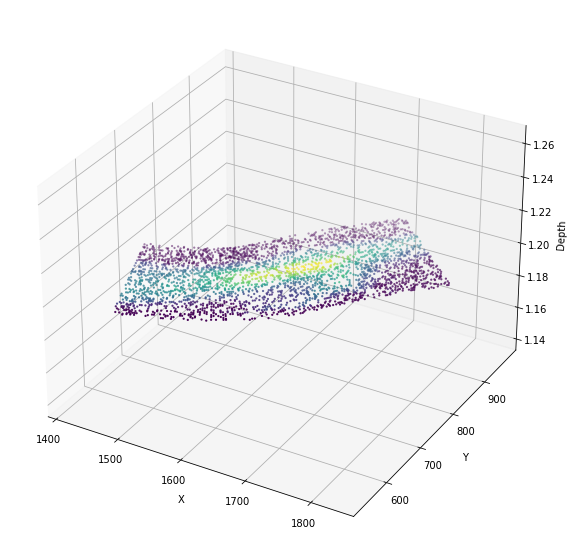

In [104]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(np.array(data_test['X']), np.array(data_test['Y']),
             np.array(h_pred),c=np.array(h_dif),
             s=5,cmap='viridis', edgecolor='none')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Depth')

Text(0.5, 0, 'Depth')

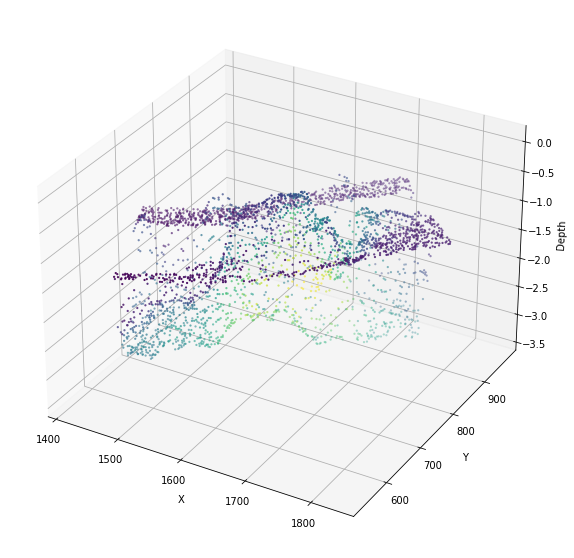

In [93]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(np.array(data_test['X']), np.array(data_test['Y']),
             np.array(u_dif),c=np.array(h_dif),
             s=5,cmap='viridis', edgecolor='none')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Depth')

Text(0.5, 0, 'Depth')

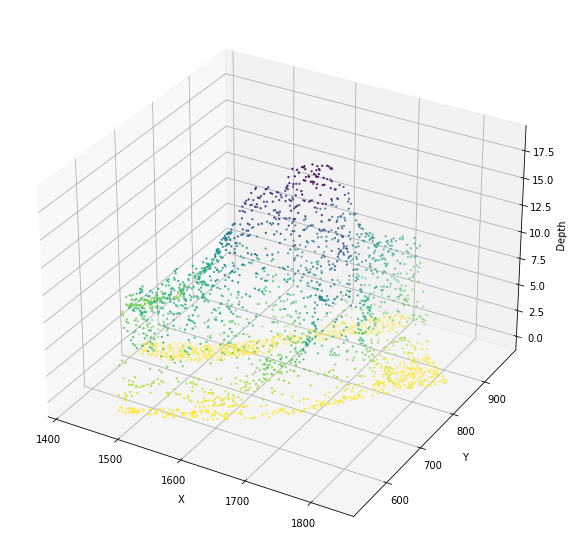

In [ ]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(np.array(data_test['X']), np.array(data_test['Y']),
             np.array(data_test['Depth']),c=np.array(h_dif),
             s=5,cmap='viridis', edgecolor='none')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Depth')

In [ ]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.2.2
